# Imports

In [11]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [23]:
n = 6
label_name = "stat6"
layers = [32, 2]
epochs = 2000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [24]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [25]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.264547944068909
Epoch 1, Loss 6.263275146484375
Epoch 2, Loss 6.262306094169617
Epoch 3, Loss 6.259881496429443
Epoch 4, Loss 6.2588794231414795
Epoch 5, Loss 6.2572537660598755
Epoch 6, Loss 6.2567139863967896
Epoch 7, Loss 6.255197107791901
Epoch 8, Loss 6.2544533014297485
Epoch 9, Loss 6.253736078739166
Epoch 10, Loss 6.252792835235596
Epoch 11, Loss 6.252195596694946
Epoch 12, Loss 6.251815438270569
Epoch 13, Loss 6.251266837120056
Epoch 14, Loss 6.250983417034149
Epoch 15, Loss 6.250289976596832
Epoch 16, Loss 6.250056564807892
Epoch 17, Loss 6.249752461910248
Epoch 18, Loss 6.249715864658356
Epoch 19, Loss 6.248748004436493
Epoch 20, Loss 6.248525977134705
Epoch 21, Loss 6.248189747333527
Epoch 22, Loss 6.247871160507202
Epoch 23, Loss 6.247561097145081
Epoch 24, Loss 6.2472997307777405
Epoch 25, Loss 6.247179269790649
Epoch 26, Loss 6.246915757656097
Epoch 27, Loss 6.246913015842438
Epoch 28, Loss 6.246336340904236
Epoch 29, Loss 6.246283769607544
Epoch 30, Loss 

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

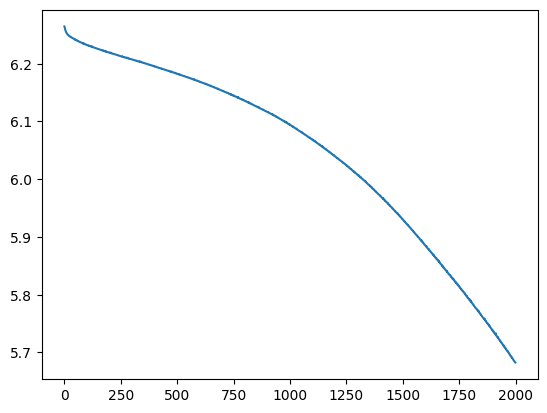

In [26]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

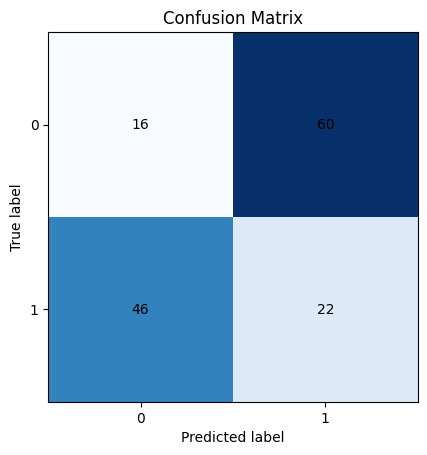

Accuracy for class 0 = 21.05263157894737%
Accuracy for class 1 = 32.35294117647059%
Overall accuracy = 26.38888888888889%


In [27]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

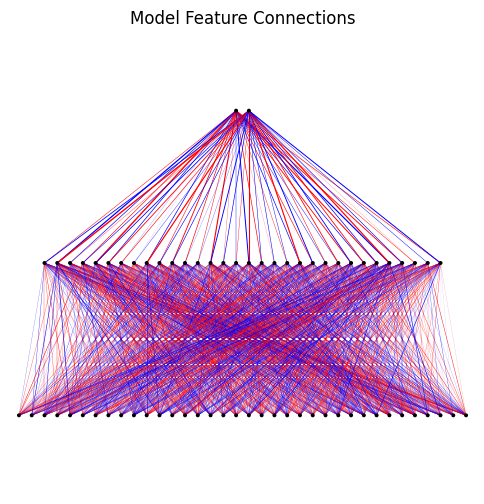

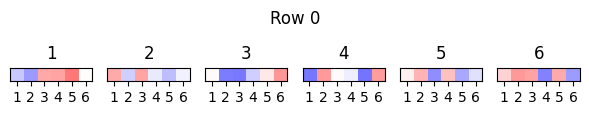

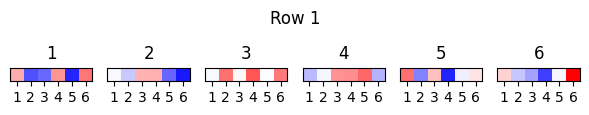

In [28]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)